In [1]:
import hashlib

In [2]:
h = hashlib.md5()

In [3]:
h.update('flavono@gmail.com'.encode('utf8'))

In [4]:
hex_list = h.hexdigest()

In [5]:
hex_list

'6da58fcde9d92018785328e8cddaf199'

In [6]:
r,g,b =[hex_list[i:i+2]for i in range(0, 6, 2)]

## Get Color

In [7]:
from PIL import Image, ImageDraw

In [74]:
color = f'#{r}{g}{b}'

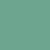

In [75]:
Image.new('RGB', (50, 50), f'#{r}{g}{b}')

## Make symmetric gird(5x5)

In [9]:
hex_list_15 = hex_list[2:]

In [10]:
hex_list_15

'a58fcde9d92018785328e8cddaf199'

In [11]:
rows = [[hex_list_15[i:i+2]for i in range(j, j+3*2, 2)] for j in range(0, 5*6, 6)]

In [12]:
rows

[['a5', '8f', 'cd'],
 ['e9', 'd9', '20'],
 ['18', '78', '53'],
 ['28', 'e8', 'cd'],
 ['da', 'f1', '99']]

In [13]:
revsered_rows = [list(reversed(row)) for row in rows]

In [14]:
[row.extend(reversed_row[1:])for row, reversed_row in zip(rows, revsered_rows)]

[None, None, None, None, None]

In [35]:
integer_grid = [list(map(lambda e: int(e ,base=16), row)) for row in rows]

In [58]:
integer_filtered = [[i if i%2==0 else 0 for i in integer_row] for integer_row in integer_grid]

In [47]:
integer_grid[0]

[165, 143, 205, 143, 165]

## Flatten(timing should be ealrier in real code)

In [60]:
flatten_grid = [e for row in integer_filtered for e in row]

In [100]:
pixels = []
for i, val in enumerate(flatten_grid):
    x = int(i%5 * 50)
    y = int(i//5 * 50)
    
    top_left = (x, y)
    bottom_right = (x + 50, y + 50)
    
    pixels.append([top_left, bottom_right])

In [101]:
im = Image.new('RGB', (250, 250), 'white')
draw = ImageDraw.Draw(im)
for grid, pixel in zip(flatten_grid, pixels):
    if grid: # not zero
        draw.rectangle(pixel, fill=color)

to debug

In [102]:
integer_filtered

[[0, 0, 0, 0, 0],
 [0, 0, 32, 0, 0],
 [24, 120, 0, 120, 24],
 [40, 232, 0, 232, 40],
 [218, 0, 0, 0, 218]]

In [103]:
pixels

[[(0, 0), (50, 50)],
 [(50, 0), (100, 50)],
 [(100, 0), (150, 50)],
 [(150, 0), (200, 50)],
 [(200, 0), (250, 50)],
 [(0, 50), (50, 100)],
 [(50, 50), (100, 100)],
 [(100, 50), (150, 100)],
 [(150, 50), (200, 100)],
 [(200, 50), (250, 100)],
 [(0, 100), (50, 150)],
 [(50, 100), (100, 150)],
 [(100, 100), (150, 150)],
 [(150, 100), (200, 150)],
 [(200, 100), (250, 150)],
 [(0, 150), (50, 200)],
 [(50, 150), (100, 200)],
 [(100, 150), (150, 200)],
 [(150, 150), (200, 200)],
 [(200, 150), (250, 200)],
 [(0, 200), (50, 250)],
 [(50, 200), (100, 250)],
 [(100, 200), (150, 250)],
 [(150, 200), (200, 250)],
 [(200, 200), (250, 250)]]

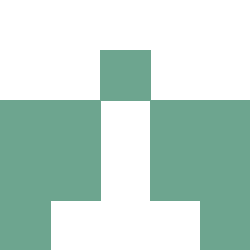

In [104]:
im